# Making figures of the FFIs

In [222]:
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
%matplotlib notebook
import ipympl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patch

import numpy as np
from astropy.io import fits
from glob import glob

from scipy.signal import convolve2d
from scipy.ndimage.filters import convolve
from scipy.interpolate import interp1d
from astropy.wcs import WCS
from tqdm import tnrange, tqdm_notebook
import warnings
warnings.filterwarnings("ignore",category = RuntimeWarning)

from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord


import reproject

In [18]:
fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

In [186]:
hdus = fits.open("/Users/ryanr/Documents/PhD/coding/Kepler/Data/ffi/ktwo2016279022810-c111_ffi-cal.fits")
#hdus.info()
data1 = hdus[80] # fits image
raw1 = data1.data
raw1 = raw1.byteswap().newbyteorder()#.copy(order='C')
clean_data1 = raw1[19:-28, 12:-20]
time1 = data1.header['TSTART'] + data1.header['BJDREFI']
wcs1 = WCS(data1.header)

hdus = fits.open("/Users/ryanr/Documents/PhD/coding/Kepler/Data/ffi/ktwo2016307123729-c112_ffi-cal.fits")
#hdus.info()
data2 = hdus[80] # fits image
raw2 = data2.data
raw2 = raw2.byteswap().newbyteorder()#.copy(order='C')
clean_data2 = raw2[19:-28, 12:-20]
time2 = data2.header['TSTART'] + data2.header['BJDREFI']
wcs2 = WCS(data2.header)

In [253]:
from matplotlib.ticker import MaxNLocator

<IPython.core.display.Javascript object>


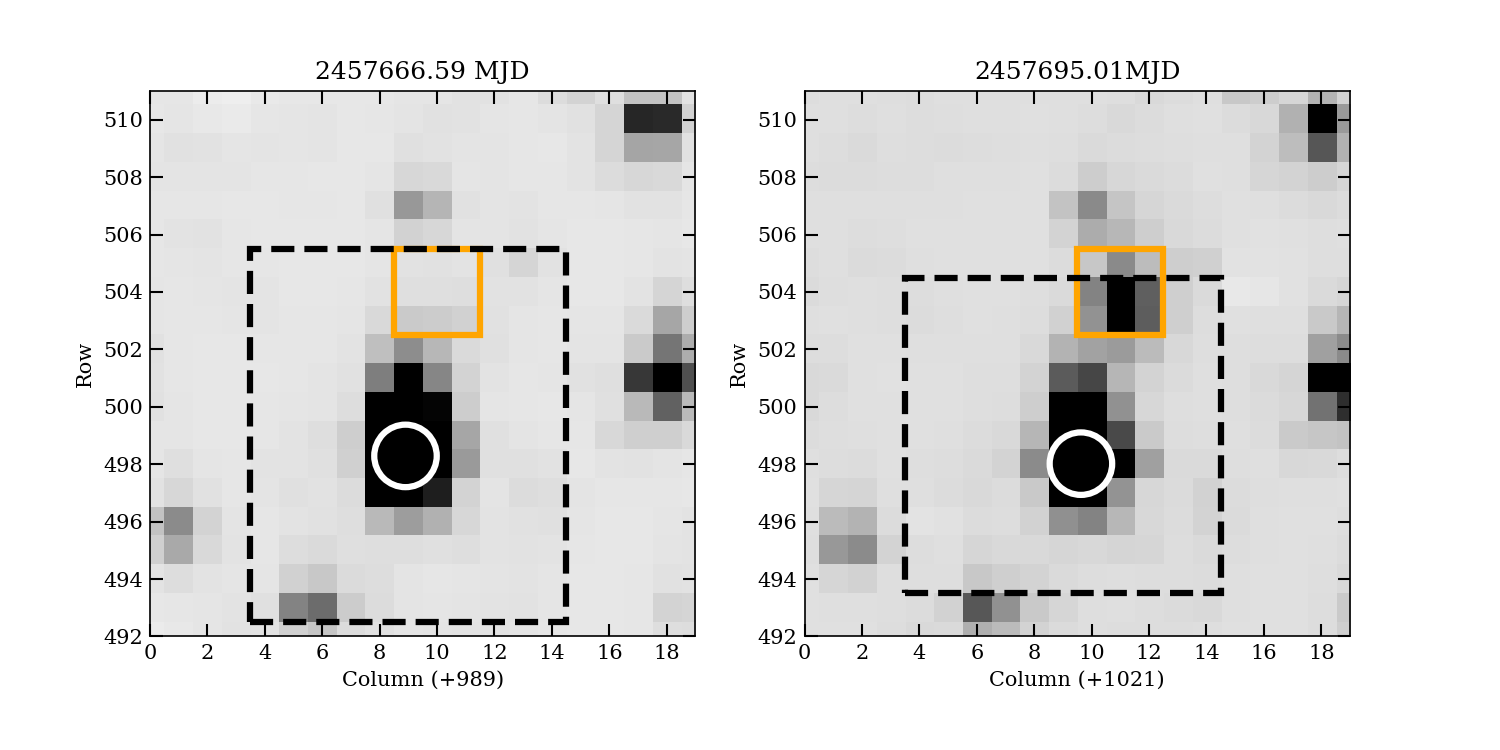

In [287]:

fig =plt.figure(figsize=(10,5))
ax = plt.subplot(121)
plt.title(str(np.round(time1,2))+' MJD')

m, s = np.nanmean(raw1), np.nanstd(raw1)
plt.imshow(raw1,vmin=0,vmax=4000,cmap=plt.get_cmap('gray_r'))

#plt.annotate('', xy=(1001, 504), xytext=(1005, 504),arrowprops=dict(facecolor='red', shrink=0.05),)


p = patch.Rectangle((998-.5,503-.5),3,3,angle=0.0,edgecolor='orange',fill=False,lw=3)
ax.add_patch(p)

p = patch.Rectangle((993-.5,493-.5),11,13,angle=0.0,edgecolor='black',fill=False,lw=3,ls='--')
ax.add_patch(p)

plt.scatter(997.9, 498.29, s=900,
           edgecolor='white', facecolor='none',lw=3)

plt.ylim(506-14,506+5)
plt.xlim(999-10,999+9)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

x1 = np.arange(989,1009,2)
x1lab = [str(e) for e in (x1-989)]
plt.xticks(x1,x1lab)

plt.xlabel('Column (+989)')
plt.ylabel('Row')
#plt.tight_layout()

#fig.set_size_inches(1.5*fig_width,1.5*fig_width)

ax = plt.subplot(122)
plt.title(str(np.round(time2,2))+'MJD')


plt.imshow(raw2,vmin=0,vmax=4000,cmap=plt.get_cmap('gray_r'))

#plt.annotate('', xy=(1033, 504), xytext=(1037, 504),arrowprops=dict(facecolor='red', shrink=0.05))

plt.scatter(1030.627, 498.02, s=900,
           edgecolor='white', facecolor='none',lw=3,)

p = patch.Rectangle((1031-.5,503-.5),3,3,angle=0.0,edgecolor='orange',fill=False,lw=3)
ax.add_patch(p)

p = patch.Rectangle((1025-.5,494-.5),11,11,angle=0.0,edgecolor='black',fill=False,lw=3,ls='--')
ax.add_patch(p)

plt.ylim(506-14,506+5)
plt.xlim(1031-10,1031+9)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

x2 = np.arange(1021,1041,2)
x2lab = [str(e) for e in (x2-1021)]
plt.xticks(x2,x2lab)

plt.xlabel('Column (+1021)')
plt.ylabel('Row')

plt.show()
#fig.set_size_inches(1.5*fig_width,1.5*fig_width)

plt.savefig('FFIc11.pdf')

In [273]:
x2lab

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19']

Work out the flux

<IPython.core.display.Javascript object>


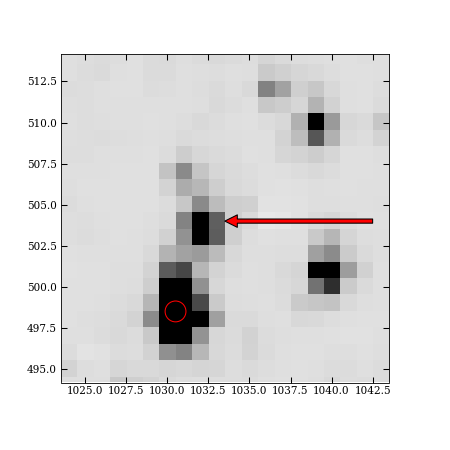

(1021, 1041)

In [159]:
plt.figure()
plt.imshow(raw2,vmin=0,vmax=4000,cmap=plt.get_cmap('gray_r'))

plt.annotate('', xy=(1033, 504), xytext=(1043, 504),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )

plt.scatter(1030.5, 500-1.5, s=400,
           edgecolor='red', facecolor='none')


plt.ylim(506-10,506+10)
plt.xlim(1031-10,1031+10)

In [168]:
np.nansum(raw2[503:506,1031:1034])


27283.273

In [194]:
mask2 = np.zeros(raw2.shape)
mask2[503:506,1031:1034] = 1
pos22 = np.where(mask2)[0]
pos12 = np.where(mask2)[1]

In [182]:
np.where(mask)[0]

array([503, 503, 503, 504, 504, 504, 505, 505, 505])

<IPython.core.display.Javascript object>


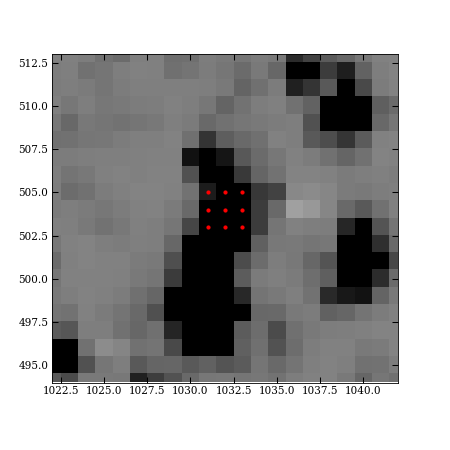

In [200]:
plt.figure()
plt.imshow(raw2,vmin=0,vmax=1000,cmap=plt.get_cmap('gray_r'))

plt.plot(pos12,pos22,'r.')


plt.ylim(494,513)
plt.xlim(1022,1042)

flux2 = np.nansum(raw2*mask2)

In [187]:
wcs2.all_world2pix(253.461,-24.775,0)

[array(1032.99026346), array(503.54467581)]

In [188]:
wcs2.all_pix2world(1032,504,0)

[array(253.46141339), array(-24.77385545)]

In [189]:
wcs1.all_world2pix(253.46141339,-24.77385545,0)

[array(999.34721898), array(504.25784146)]

In [ ]:
16 53 49.052	-24 46 23.24

In [210]:
c = SkyCoord('16h53m49.052s', '+24d46m23.24s', frame='icrs')

In [212]:
c.to_string('decimal')

'253.454 24.7731'

In [219]:
wcs2.all_world2pix(253.454,-24.7731,0)

[array(1030.62768092), array(498.02547992)]

In [192]:
mask1 = np.zeros(raw1.shape)
mask1[503:506,998:1002] = 1
pos21 = np.where(mask1)[0]
pos11 = np.where(mask1)[1]
flux1 = np.nansum(mask1*raw1)

In [196]:
flux2-flux1

20586.193939208984

In [135]:
hdu = fits.open("/Users/ryanr/Documents/PhD/coding/Kepler/Data/ffi/ktwo2016307123729-c112_ffi-cal.fits")[80]
wcs = WCS(hdu.header)

In [121]:
wcs.all_world2pix(253.461,-24.775,0)

[array(1032.99026346), array(503.54467581)]

In [11]:
test = reproject.reproject_exact((hdu.data,wcs),hdu.header)

In [12]:
np.where(np.isfinite(test))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

<IPython.core.display.Javascript object>


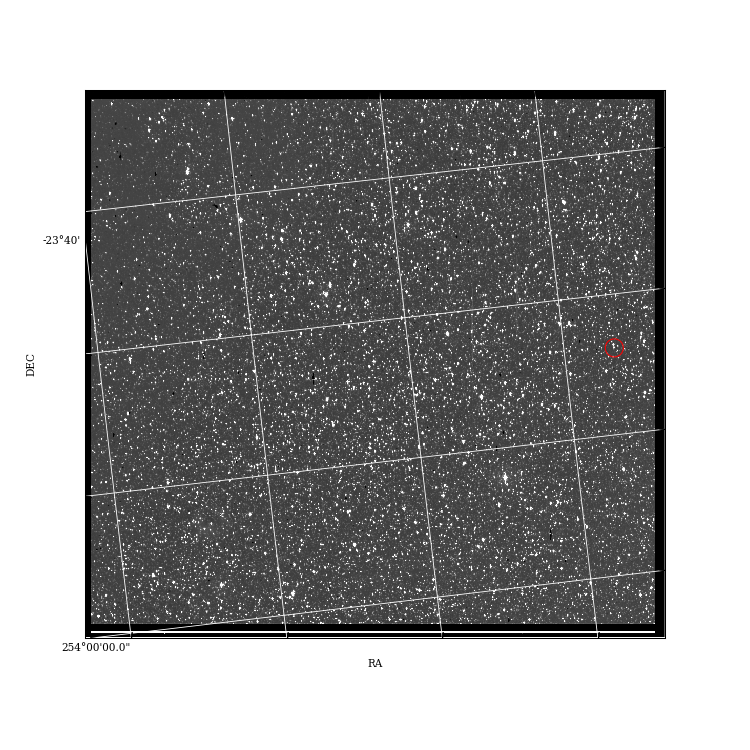

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(111,projection=wcs)
plt.imshow(hdu.data,vmin=0,vmax = 2000,cmap='gray')
plt.grid(color='white', ls='solid')

#plt.plot(1034,505,'r.')

#plt.ylim(505-30,505+29)
#plt.xlim(1034-30,1034+29)

ax = plt.gca()
ax.scatter(253.461, -24.775, transform=ax.get_transform('fk5'), s=300,
           edgecolor='red', facecolor='none')
ra = ax.coords['ra']
dec = ax.coords['dec']

ra.set_axislabel('RA')
dec.set_axislabel('DEC')

ra.set_major_formatter('dd:mm:ss.s')
dec.set_major_formatter('dd:mm')

ra.set_ticks_position('all')
dec.set_ticks(number=4)


ra.set_ticks_visible(True)
ra.set_ticklabel_visible(True)
plt.show()

In [26]:
wcsslice = wcs[1034-301034+29,505-30:505+29]

ValueError: Cannot downsample a WCS with indexing.  Use wcs.sub or wcs.dropaxis if you want to remove axes.

In [36]:
wcs.slice

SyntaxError: invalid syntax (<ipython-input-36-5974168f95cf>, line 1)

<IPython.core.display.Javascript object>


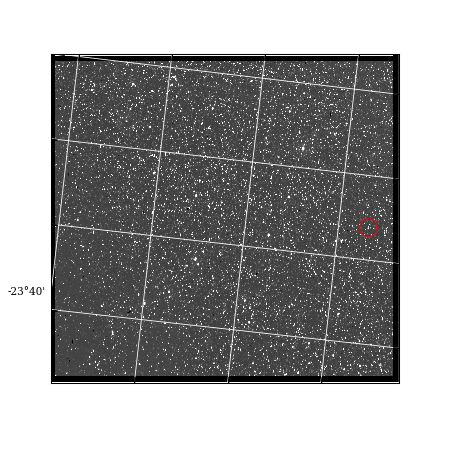

In [39]:

plt.figure()
ax = plt.subplot(111,projection=wcs)
plt.imshow(hdu.data,vmin=0,vmax = 2000,cmap='gray')
plt.grid(color='white', ls='solid')

#plt.plot(1034,505,'r.')

#plt.ylim(505-30,505+29)
#plt.xlim(1034-30,1034+29)

ax.set_xlim(-0.5, hdu.data.shape[1] - 0.5)
ax.set_ylim(-0.5, hdu.data.shape[0] - 0.5)

ax.scatter(253.461, -24.775, transform=ax.get_transform('fk5'), s=300,
           edgecolor='red', facecolor='none')
ra = ax.coords['ra']
dec = ax.coords['dec']

ra.set_axislabel('RA')
dec.set_axislabel('DEC')

ra.set_major_formatter('dd:mm:ss.s')
dec.set_major_formatter('dd:mm')

ra.set_ticks_position('all')
dec.set_ticks(number=4)


ra.set_ticks_visible(True)
ra.set_ticklabel_visible(True)
plt.show()

In [40]:
header

NameError: name 'header' is not defined

In [41]:
hdu.header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 1132 / length of first array dimension                
NAXIS2  =                 1070 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'MOD.OUT 23.4'       / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
TELESCOP= 'Kepler  '           / telescope                                      
INSTRUME= 'Kepler Photometer'  / detector type                                  
CHANNEL =                   

<IPython.core.display.Javascript object>


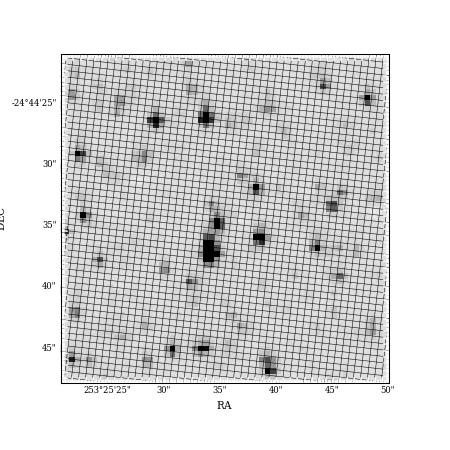

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs)
im = ax.imshow(raw2,origin='lower',cmap='gray_r',vmin=0,vmax=4000)
ra = ax.coords[0]
ra.set_ticklabel(size=8)
ra.set_axislabel(r'$RA$')
ra.display_minor_ticks(True)
#ra.set_ticks(number=50)
#ra.ticks()
dec = ax.coords[1]
dec.set_ticklabel(size=8)
dec.display_minor_ticks(True)
dec.set_axislabel(r'$DEC$')

plt.ylim(505-30,505+29)
plt.xlim(1034-30,1034+29)

from astropy import units as u
ra.set_ticks(spacing=5 * u.arcsec, color='white', exclude_overlapping=True)
dec.set_ticks(spacing=5 * u.arcsec, color='white', exclude_overlapping=True)

ax.coords.grid(True, color='k', ls='solid', alpha=1, linewidth=0.5)

<IPython.core.display.Javascript object>


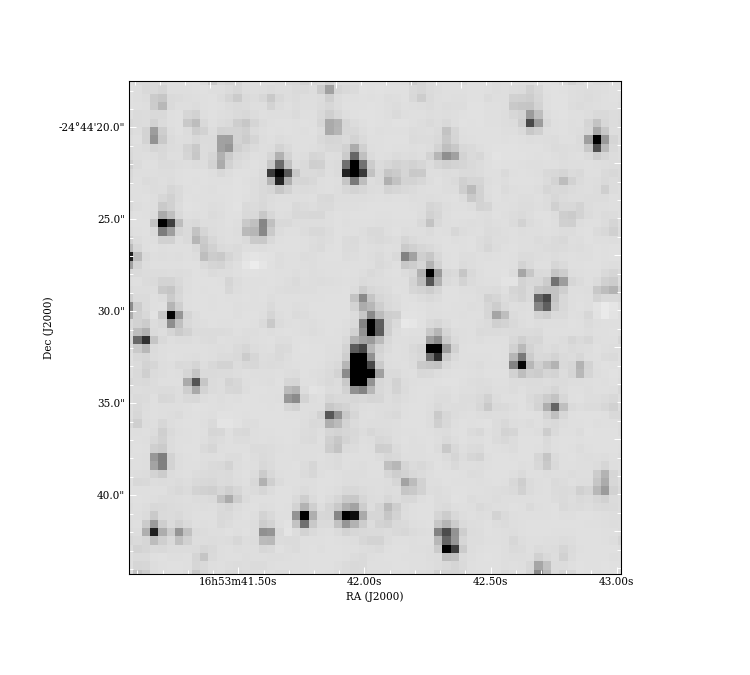

(1004, 1063)

In [88]:
import aplpy
gc = aplpy.FITSFigure("/Users/ryanr/Documents/PhD/coding/Kepler/Data/ffi/ktwo2016307123729-c112_ffi-cal.fits",hdu=80)
gc.show_colorscale(cmap='gray_r',vmin=0,vmax=4000)
plt.ylim(505-30,505+29)
plt.xlim(1034-30,1034+29)

<IPython.core.display.Javascript object>


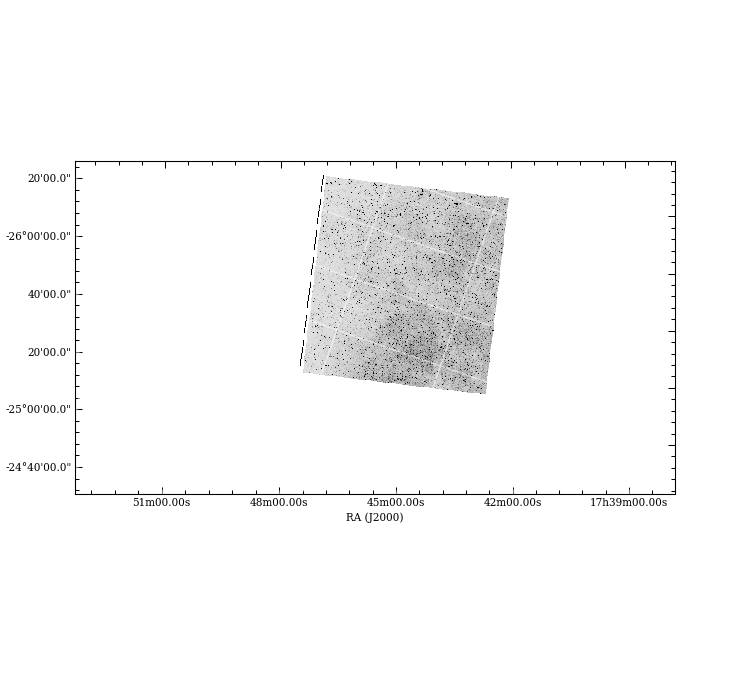

In [105]:
f = aplpy.FITSFigure("/Users/ryanr/Documents/PhD/coding/Kepler/Data/ffi/ktwo2016279022810-c111_ffi-cal_test.fits",hdu=0)
f.show_colorscale(cmap='gray_r',vmin=0,vmax=4000)
f.add_grid()
f.grid.set_color('white')
f.grid.set_alpha(0.5)
#plt.ylim(505-30,505+29)
#plt.xlim(1034-30,1034+29)
f.set_theme('publication')
plt.savefig('test.pdf')